In [48]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import OrdinalEncoder
from fancyimpute import KNN
from scipy import stats
import statsmodels.api as sm
from scipy.stats import norm
from sklearn.preprocessing import OrdinalEncoder

In [49]:
train = pd.read_csv('/content/train.csv')
test = pd.read_csv('/content/test.csv')
train.head()

Id  MSSubClass MSZoning  ...  SaleType  SaleCondition SalePrice
0   1          60       RL  ...        WD         Normal    208500
1   2          20       RL  ...        WD         Normal    181500
2   3          60       RL  ...        WD         Normal    223500
3   4          70       RL  ...        WD        Abnorml    140000
4   5          60       RL  ...        WD         Normal    250000

[5 rows x 81 columns]

In [50]:
test.head()

Id  MSSubClass MSZoning  ...  YrSold  SaleType SaleCondition
0  1461          20       RH  ...    2010        WD        Normal
1  1462          20       RL  ...    2010        WD        Normal
2  1463          60       RL  ...    2010        WD        Normal
3  1464          60       RL  ...    2010        WD        Normal
4  1465         120       RL  ...    2010        WD        Normal

[5 rows x 80 columns]

In [51]:
print('the shape of train is: ',train.shape)
print('the shape of test is: ',test.shape)

the shape of train is:  (1460, 81)
the shape of test is:  (1459, 80)


In [52]:
train.isnull().sum().sort_values(ascending = False)

PoolQC           1453
MiscFeature      1406
Alley            1369
Fence            1179
FireplaceQu       690
                 ... 
CentralAir          0
SaleCondition       0
Heating             0
TotalBsmtSF         0
Id                  0
Length: 81, dtype: int64

In [53]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [54]:
train = train.drop('Id', axis=1)

Exploratory data Analysis

In [55]:
train.columns

Index(['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street', 'Alley',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
       'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond',
       'PavedDrive', 'Wo

lets check the distribution of target variable

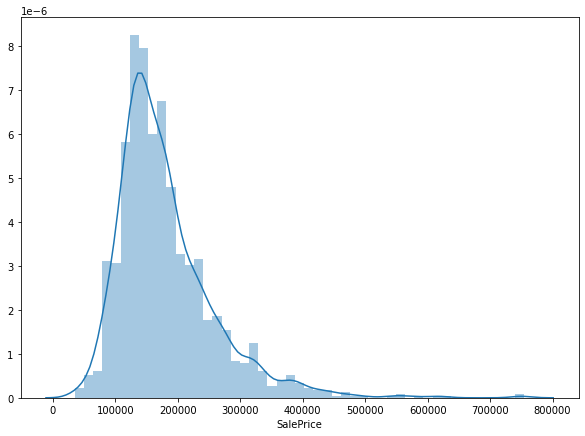

In [56]:
plt.figure(figsize=(10,7))
sns.distplot(train['SalePrice'])

In [57]:
num_cols = train.select_dtypes(include=[np.number]).columns
cat_cols = train.select_dtypes(include=[np.object]).columns

In [58]:
#to check the distribution of numeric cols

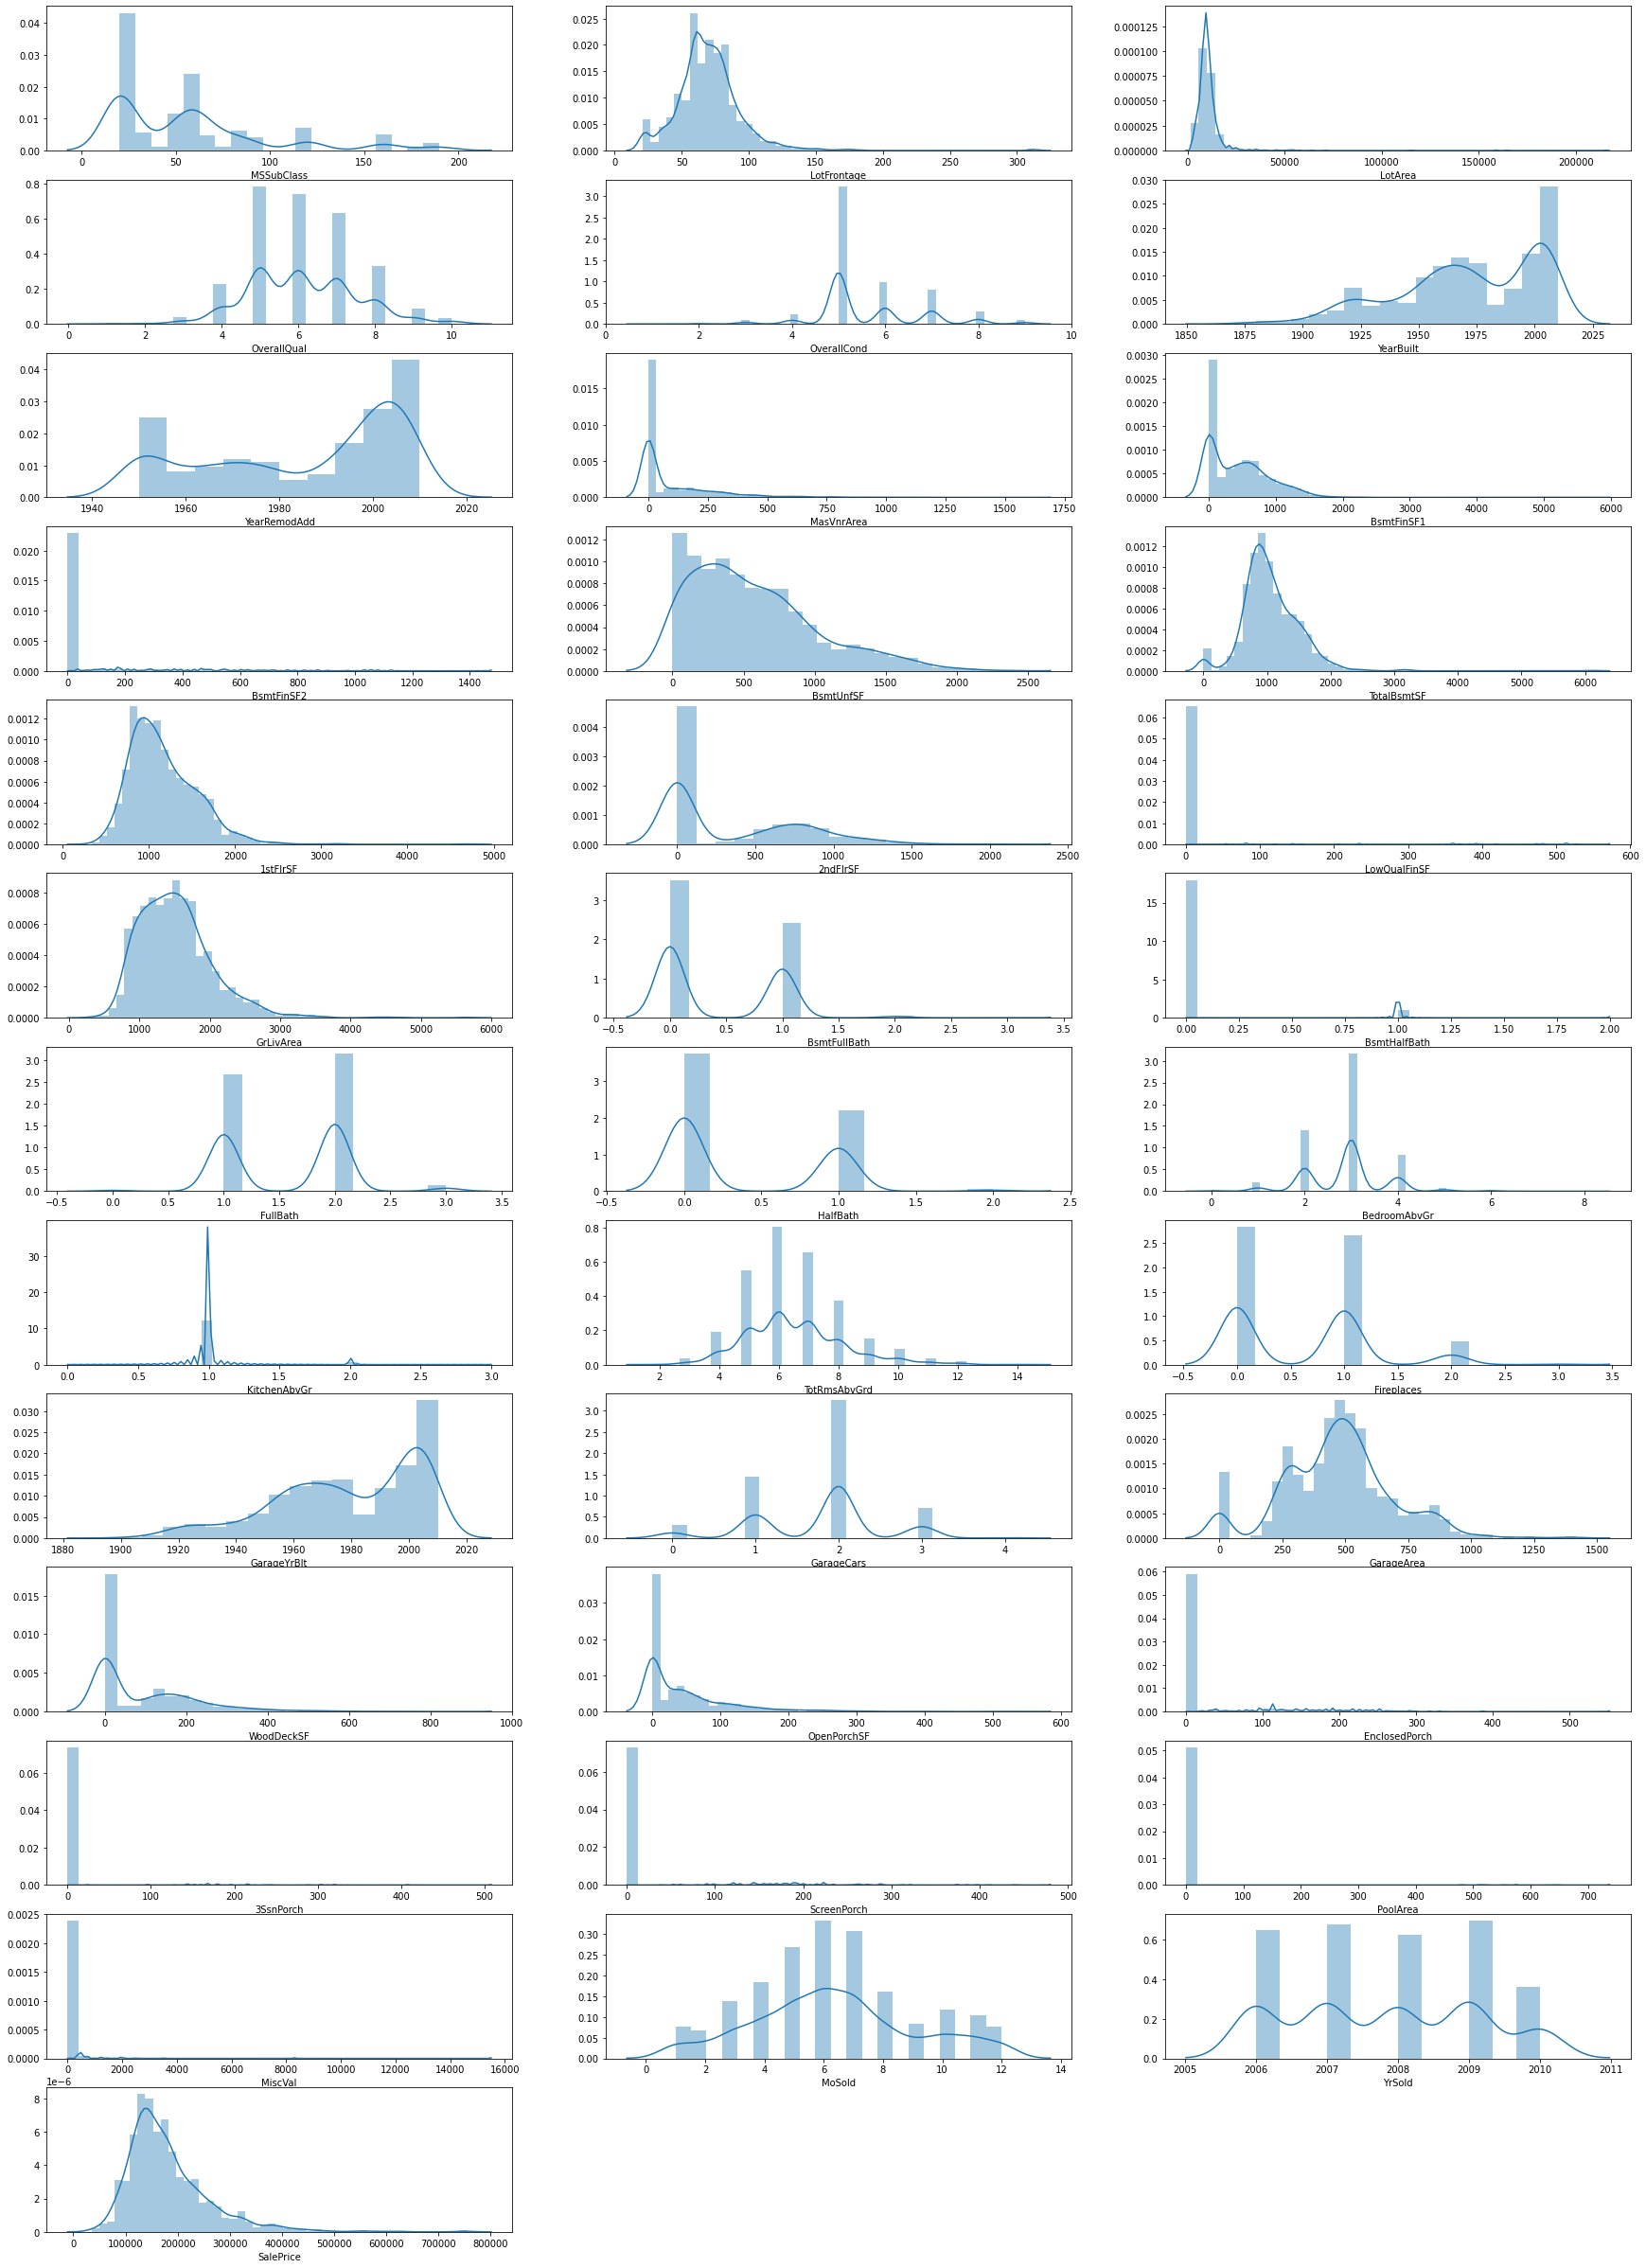

In [59]:
plt.figure(figsize=(30,50))
for i in range(len(num_cols)):
  plt.subplot(15,3,i+1)
  sns.distplot(train[num_cols[i]])
  plt.show

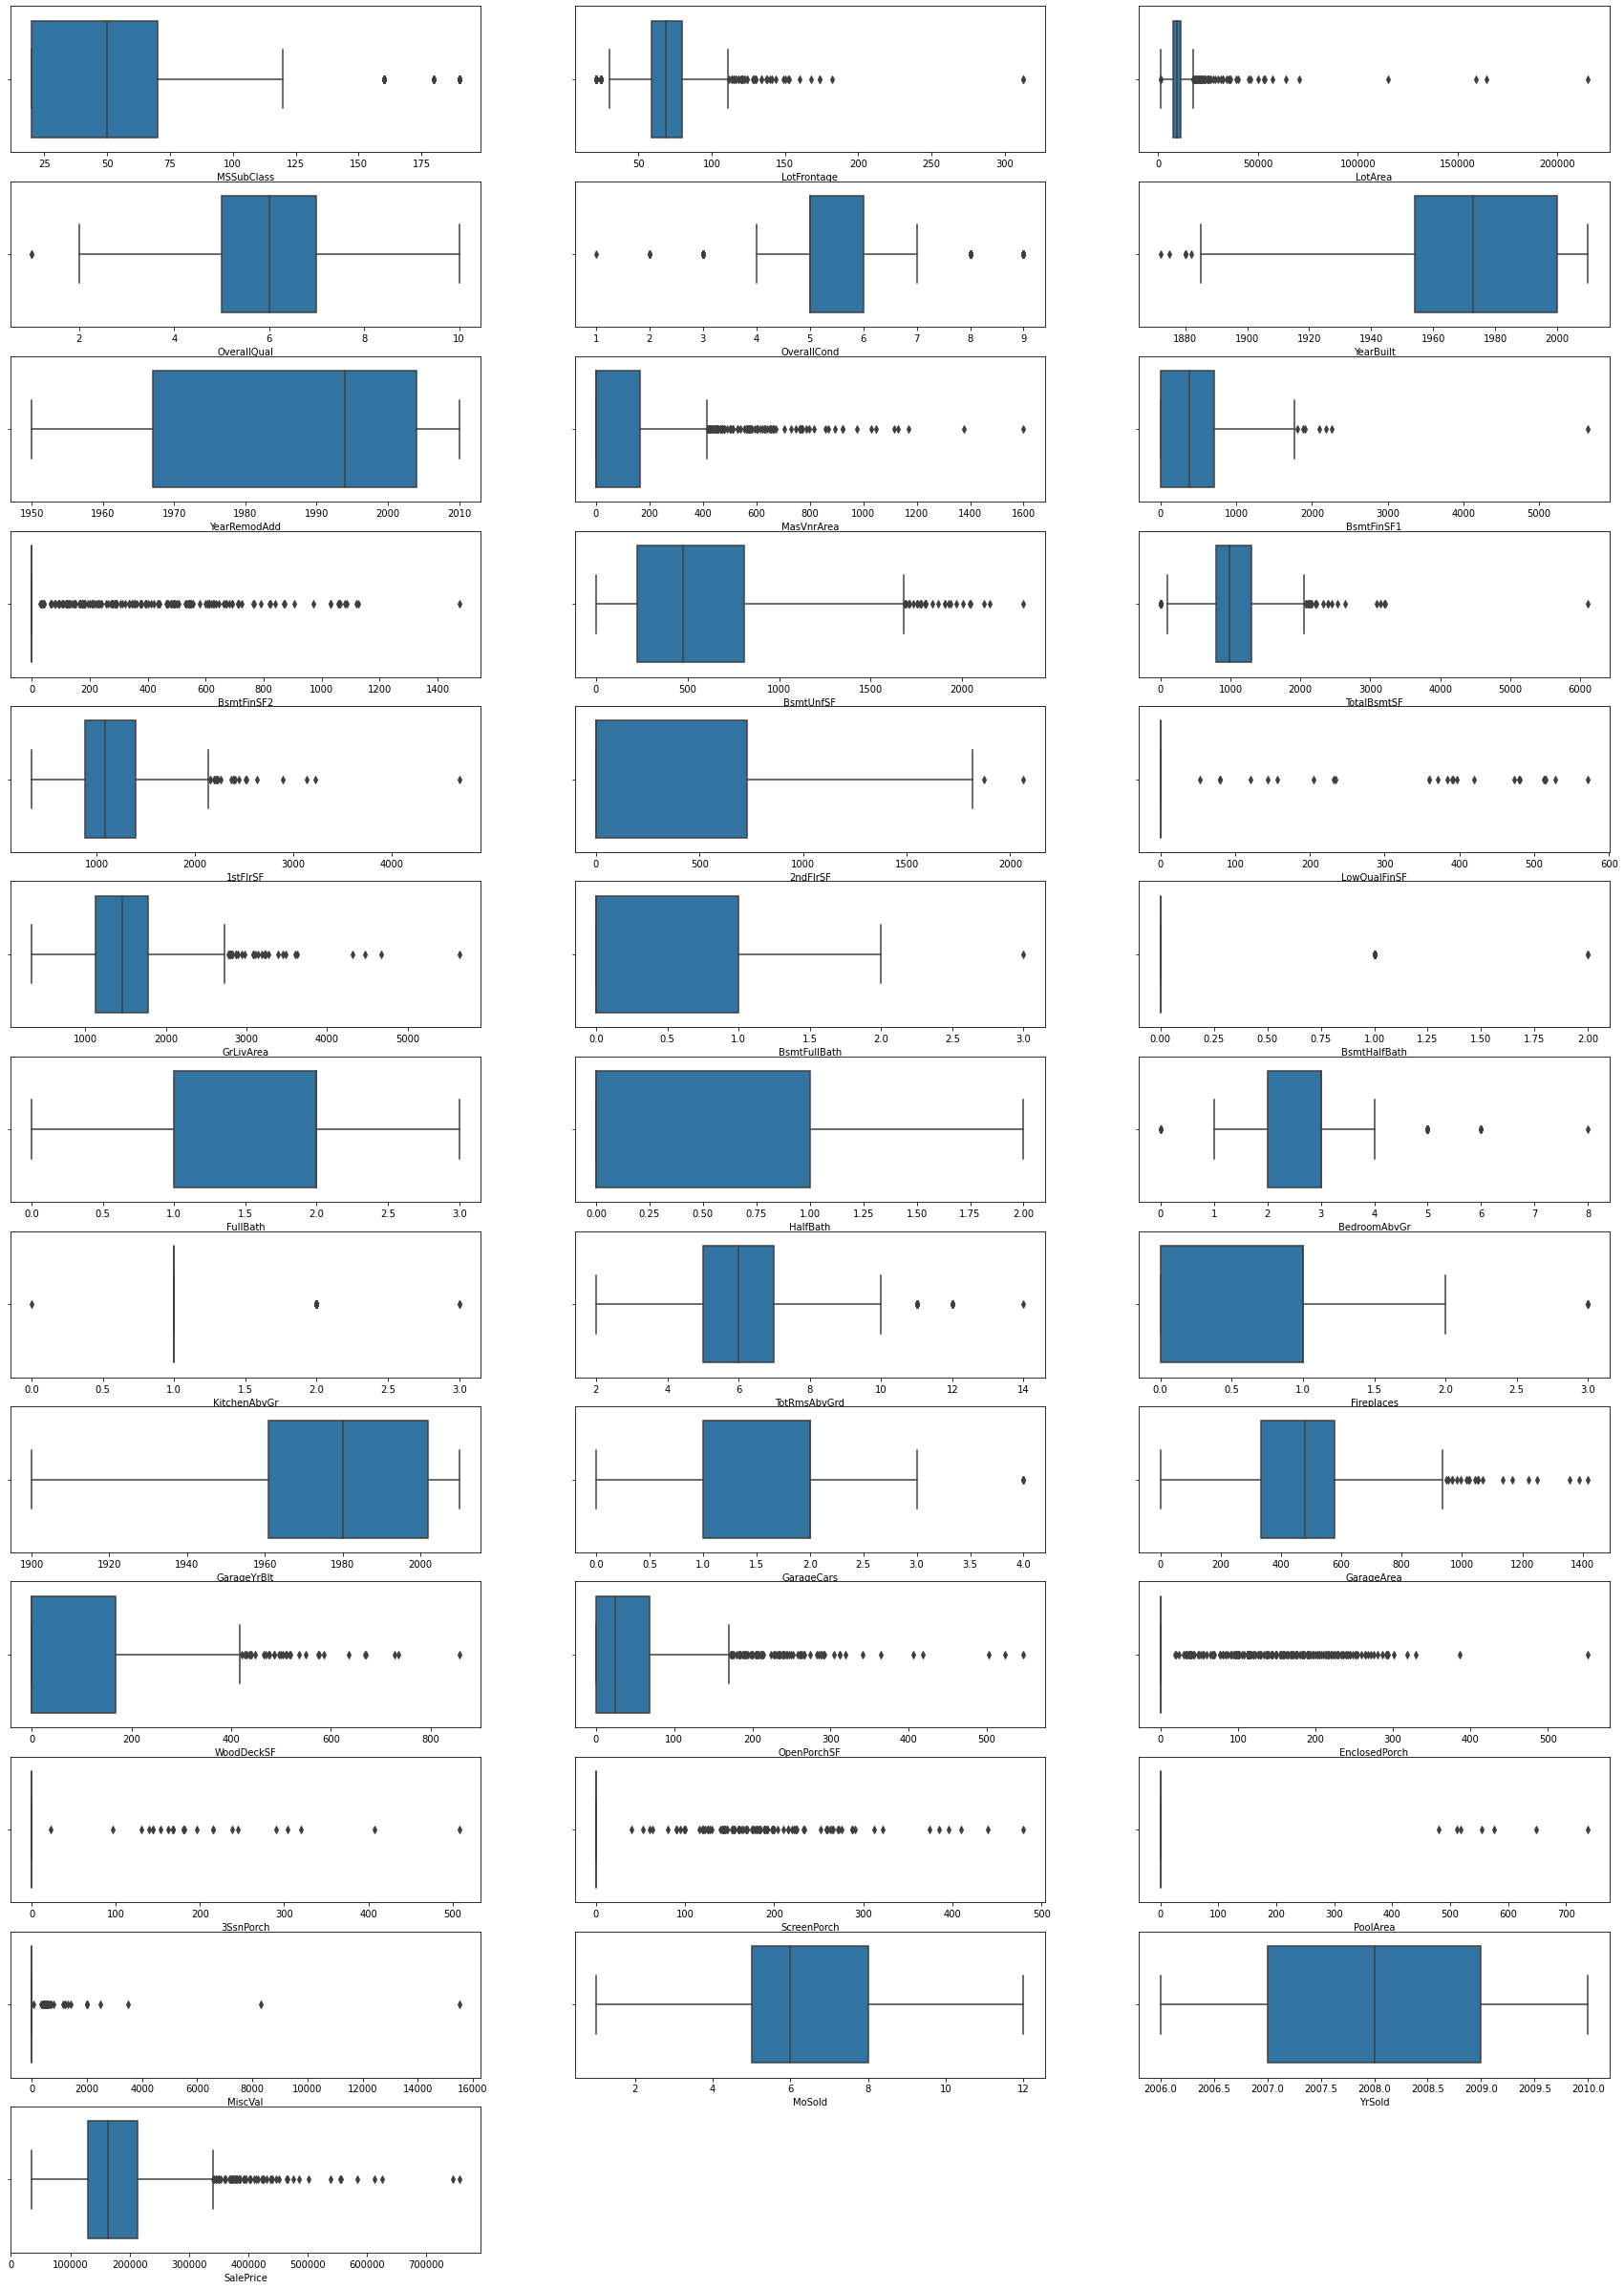

In [60]:
plt.figure(figsize=(30,50))
for i in range(len(num_cols)):
  plt.subplot(15,3,i+1)
  sns.boxplot(train[num_cols[i]])
  plt.show

there are lot of outliers in the dataset

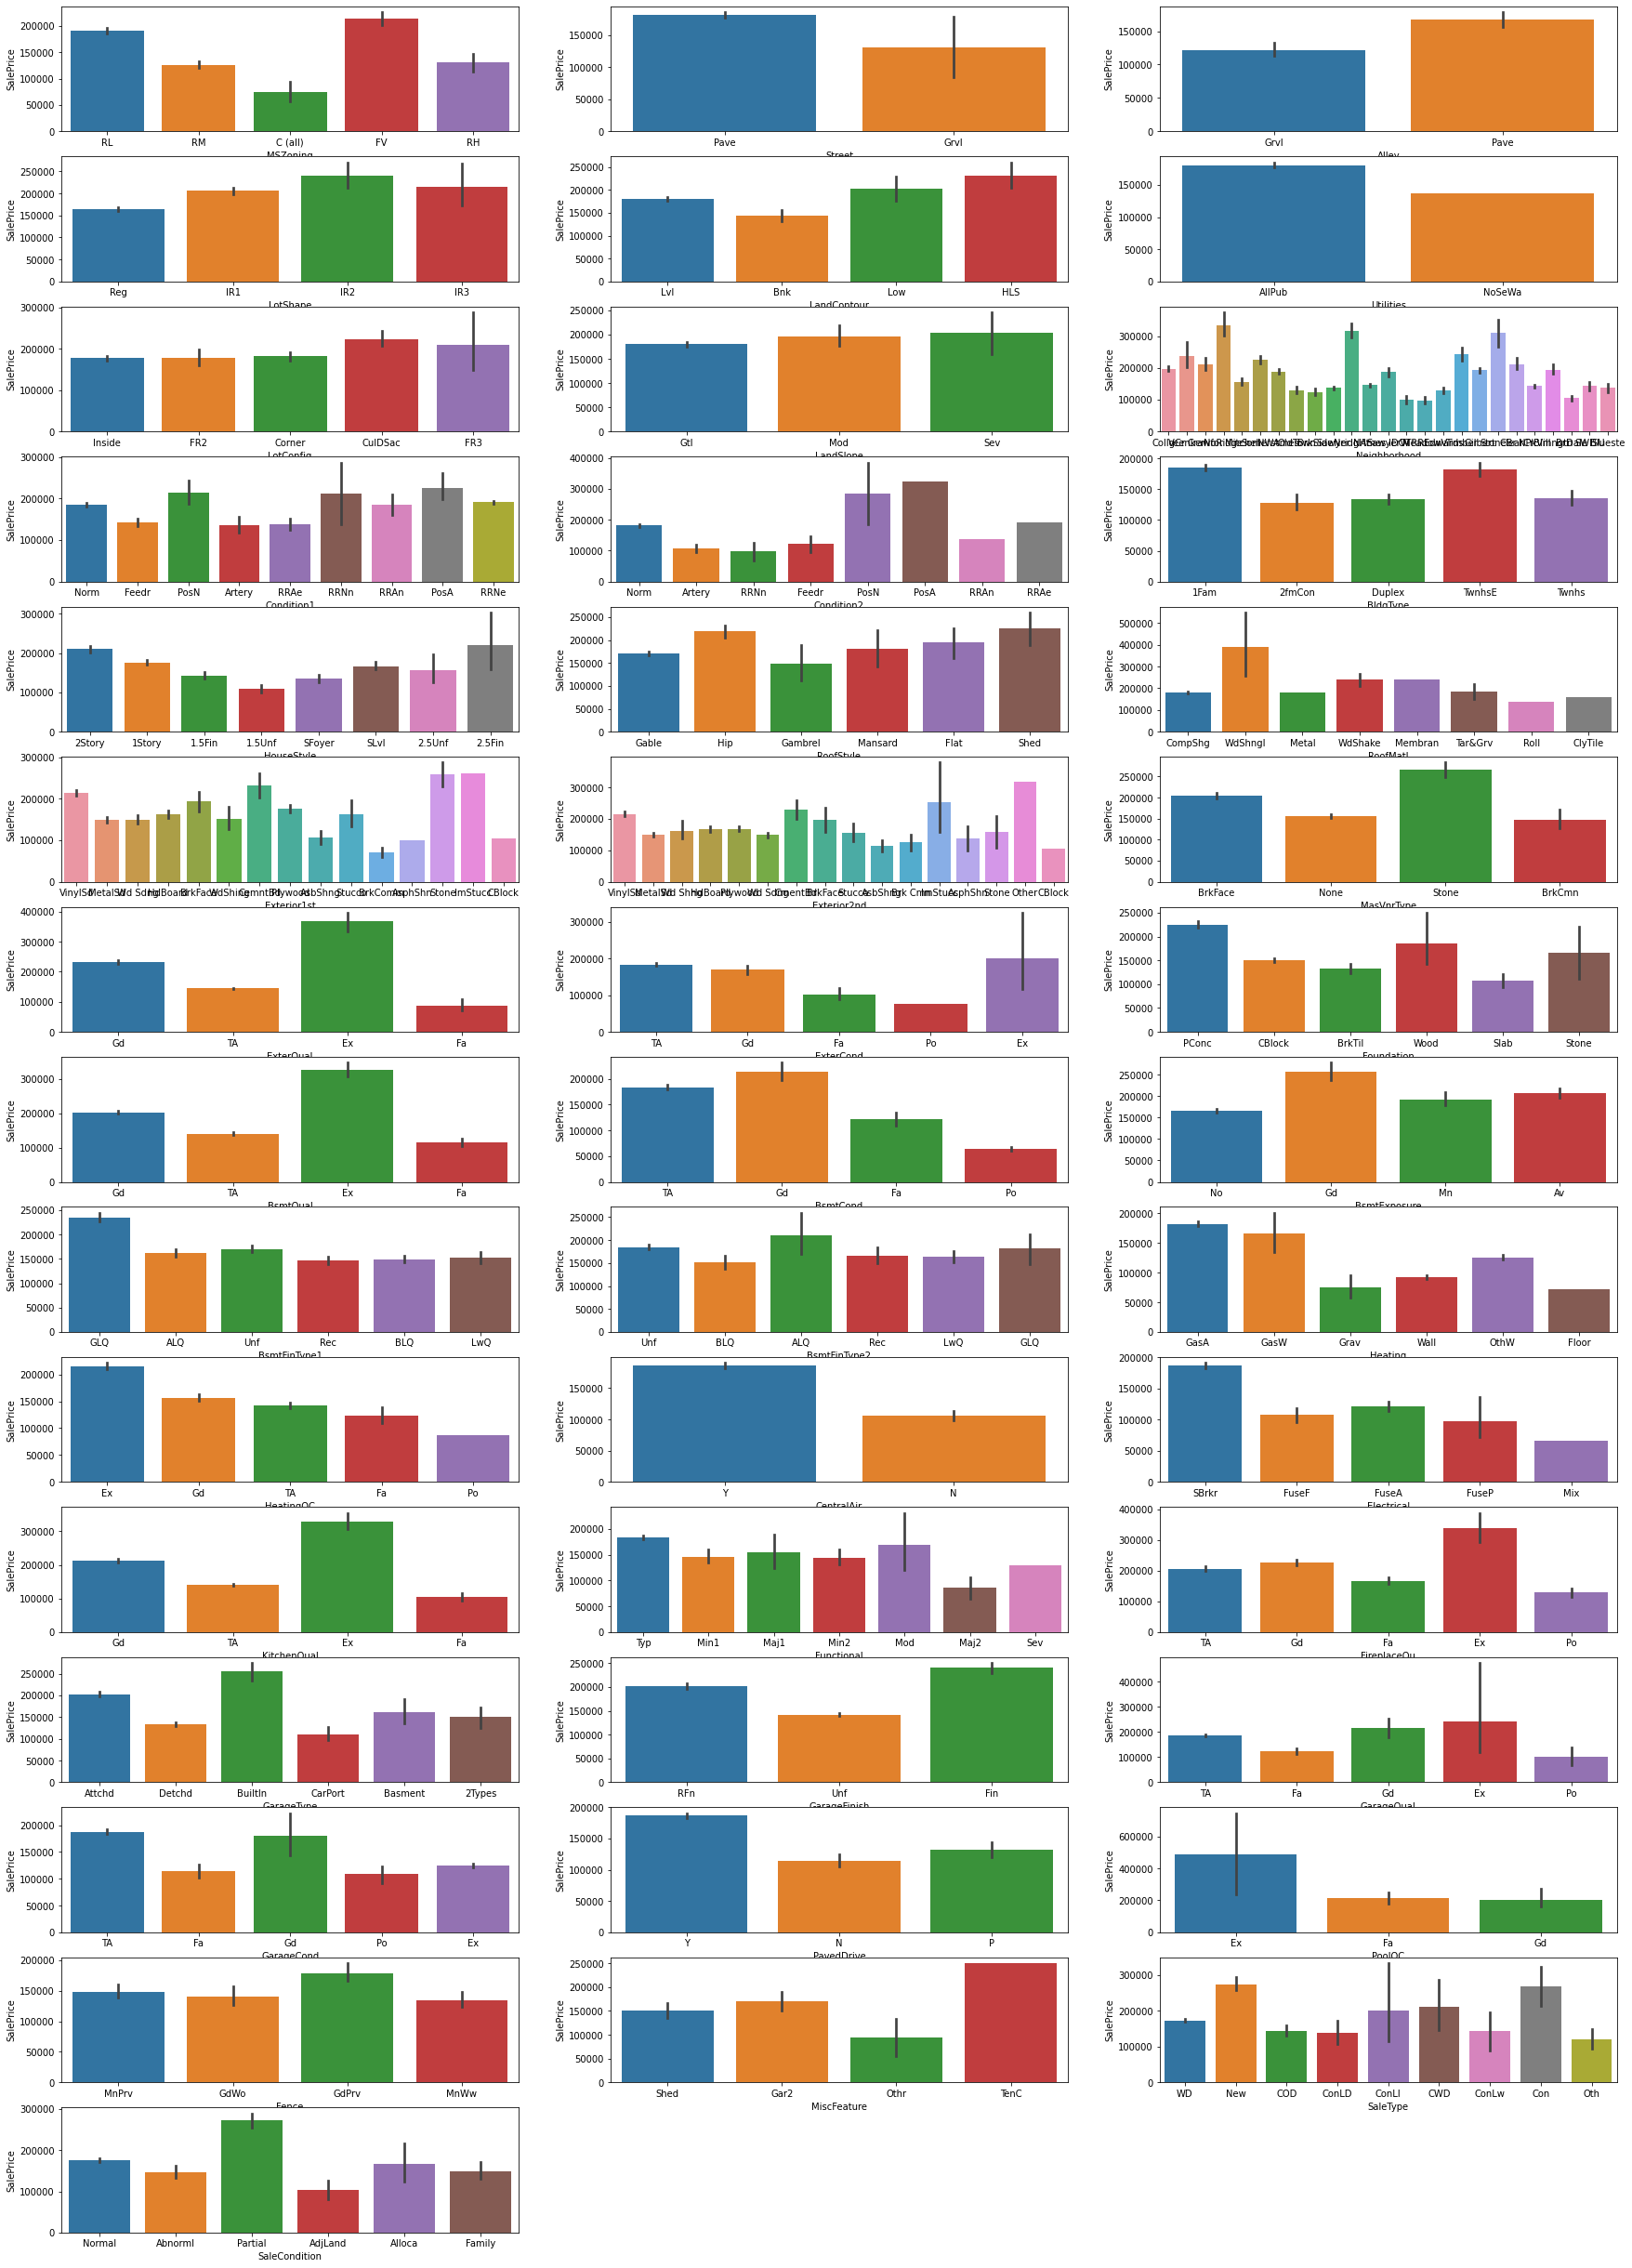

In [61]:
plt.figure(figsize=(30,50))
for i in range(len(cat_cols)):
  plt.subplot(17,3,i+1)
  sns.barplot(train[cat_cols[i]], train['SalePrice'])
  plt.show

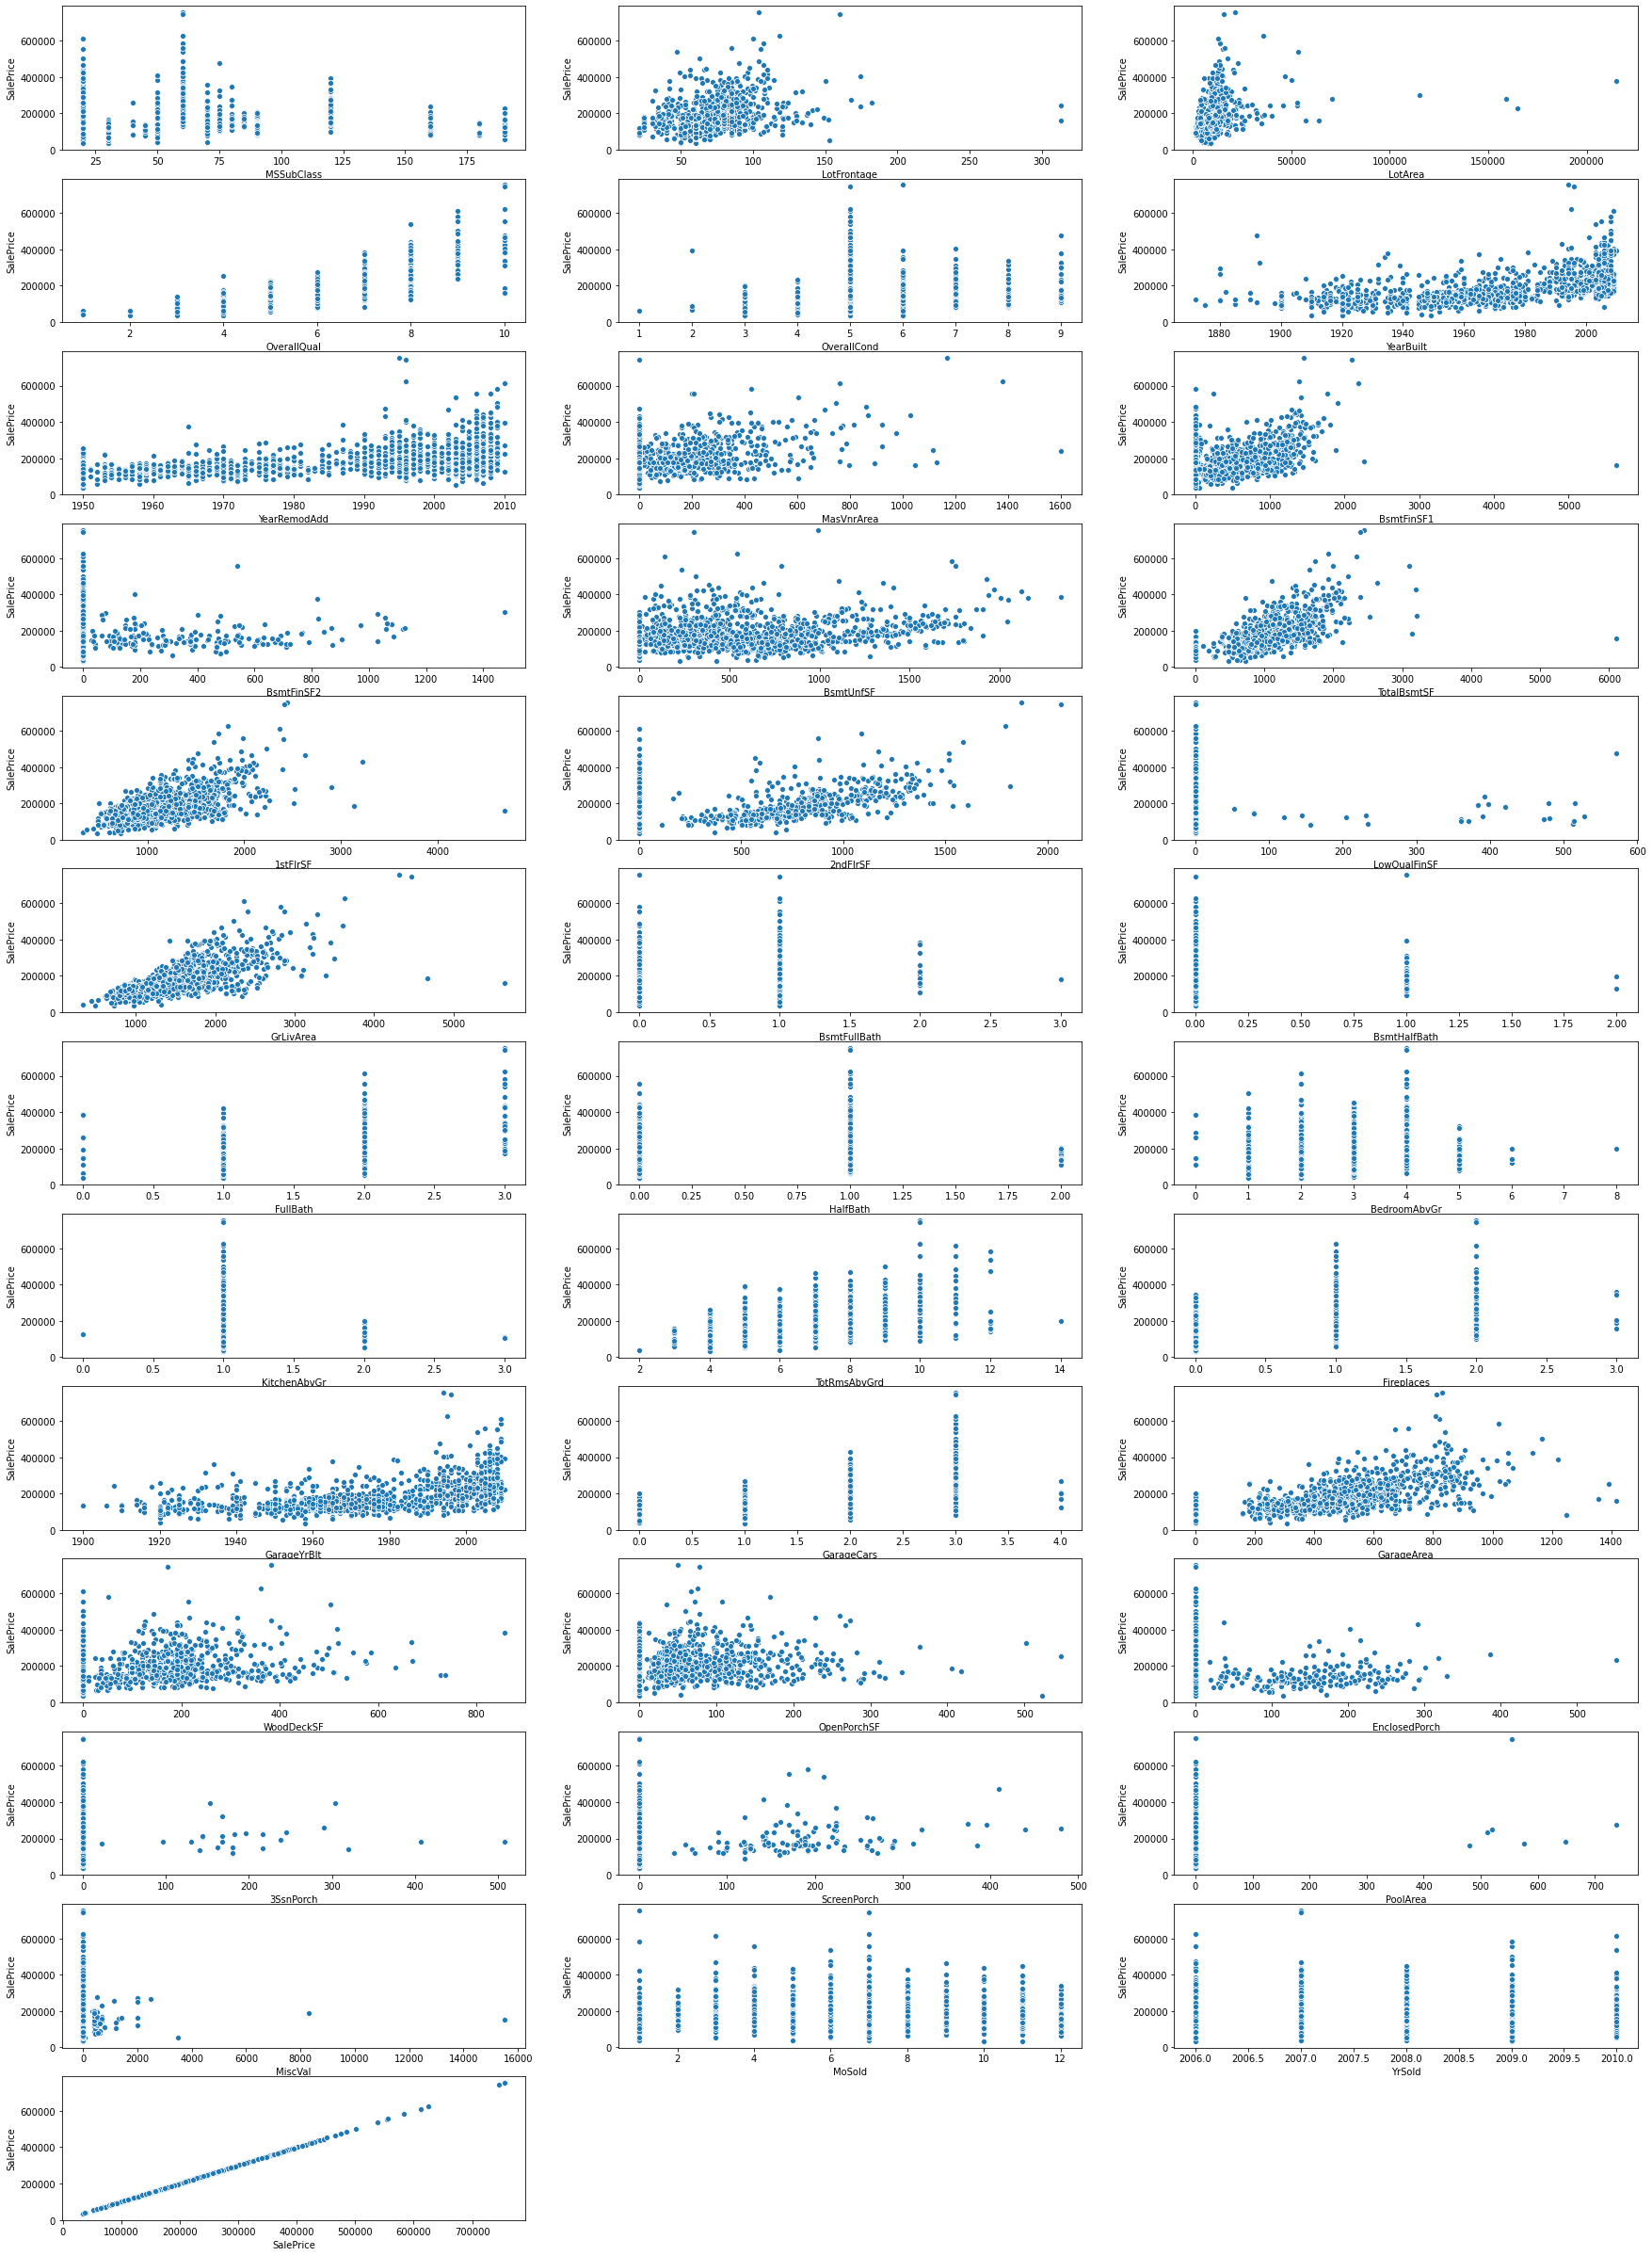

In [62]:
plt.figure(figsize=(30,50))
for i in range(len(num_cols)):
  plt.subplot(15,3,i+1)
  sns.scatterplot(train[num_cols[i]], train['SalePrice'])
  plt.show

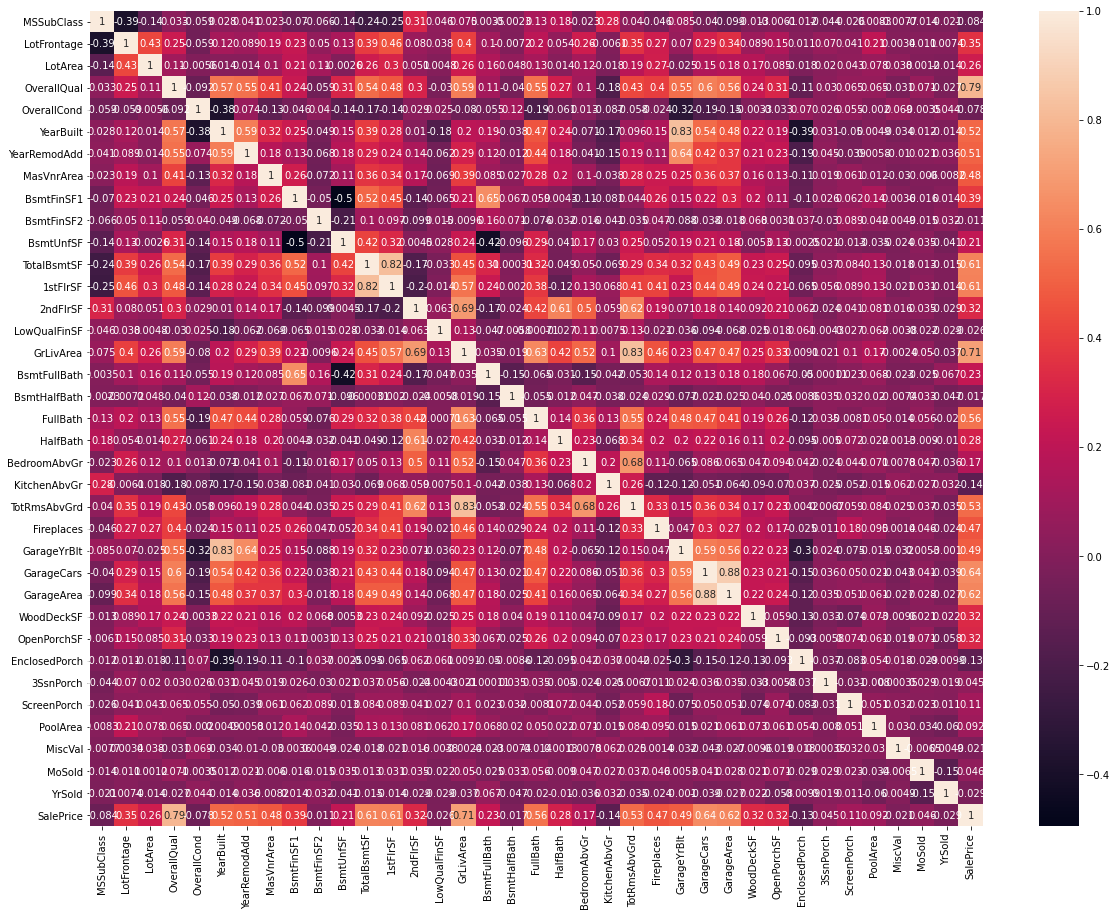

In [63]:
plt.figure(figsize=(20,15))
sns.heatmap(train[num_cols].corr(), annot= True, cbar=True)

from the above analysis, the important variables seems to be OverallQual, TotalBsmtSF, 1stFlrSF, GrLivArea , FullBath, TotRmsAbvGrd, GarageCars, GarageArea, 

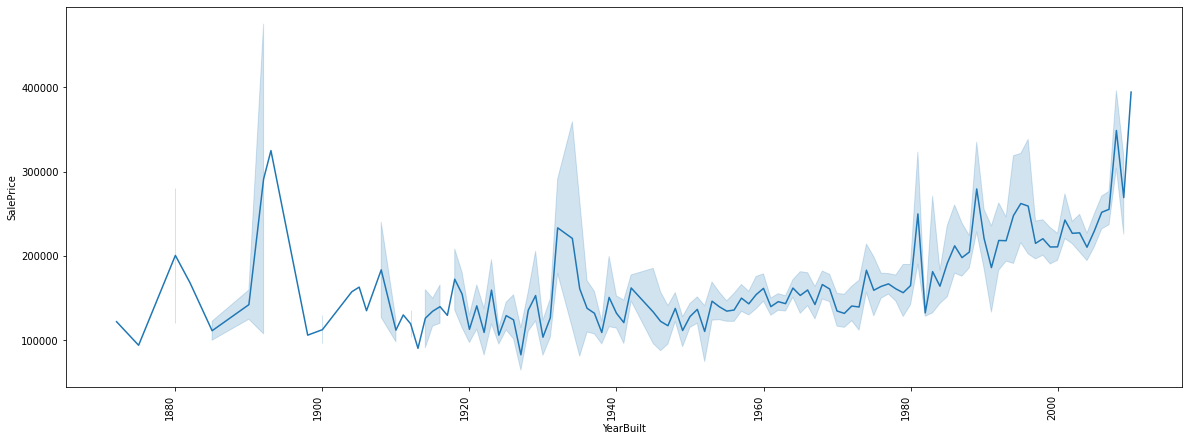

In [64]:
plt.figure(figsize=(20,7))
sns.lineplot(x = 'YearBuilt', y= 'SalePrice', data= train)
plt.xticks(rotation = 90, ha = 'right');

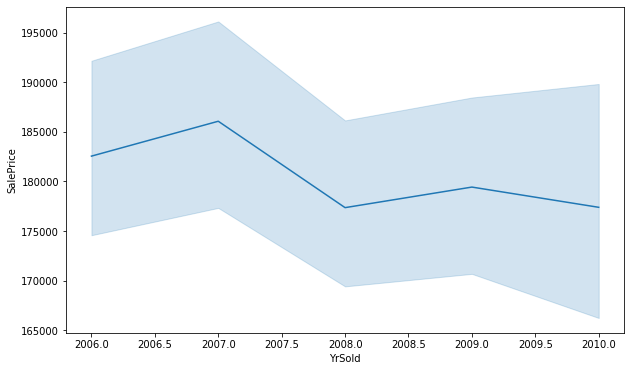

In [65]:
plt.figure(figsize=(10,6))
sns.lineplot(x = 'YrSold', y= 'SalePrice', data= train)

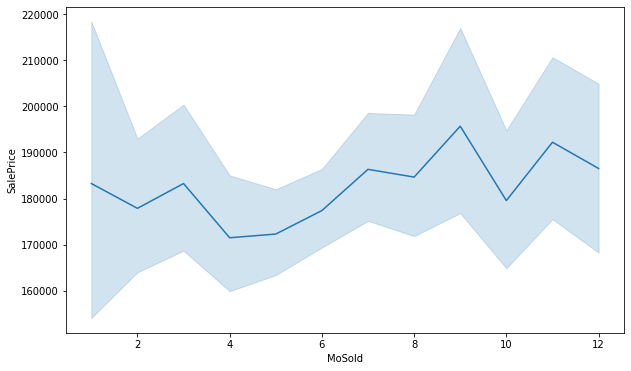

In [66]:
plt.figure(figsize=(10,6))
sns.lineplot(x = 'MoSold', y= 'SalePrice', data= train)

In [67]:
#missing data
total = train.isnull().sum().sort_values(ascending=False)
percent = (train.isnull().sum()/train.isnull().count()).sort_values(ascending=False)
missing = pd.concat([percent], axis=1, keys=['Percent'])
missing.head(20)

Percent
PoolQC        0.995205
MiscFeature   0.963014
Alley         0.937671
Fence         0.807534
FireplaceQu   0.472603
LotFrontage   0.177397
GarageType    0.055479
GarageCond    0.055479
GarageFinish  0.055479
GarageQual    0.055479
GarageYrBlt   0.055479
BsmtFinType2  0.026027
BsmtExposure  0.026027
BsmtQual      0.025342
BsmtCond      0.025342
BsmtFinType1  0.025342
MasVnrArea    0.005479
MasVnrType    0.005479
Electrical    0.000685
RoofMatl      0.000000

In [68]:
#we are reomoving top 5 missing data columns since there are lot of missing values(i.e more than 10-15% missing values)
train = train.drop(columns =['PoolQC', 'MiscFeature', 'Alley', 'Fence', 'FireplaceQu', 'LotFrontage'], axis =1)
test = test.drop(columns =['PoolQC', 'MiscFeature', 'Alley', 'Fence', 'FireplaceQu', 'LotFrontage'], axis =1)
#Lets explore other variable if they are important ones

Lets explore about missing values



In [69]:
train[['GarageCond', 'GarageQual', 'GarageFinish', 'GarageType', 'GarageYrBlt', 'BsmtFinType1', 'BsmtExposure', 'BsmtQual','BsmtCond', 'BsmtFinType1', 'MasVnrArea', 'MasVnrType', 'Electrical']].isnull().sum()

GarageCond      81
GarageQual      81
GarageFinish    81
GarageType      81
GarageYrBlt     81
BsmtFinType1    37
BsmtExposure    38
BsmtQual        37
BsmtCond        37
BsmtFinType1    37
MasVnrArea       8
MasVnrType       8
Electrical       1
dtype: int64

In [70]:
train =train.drop(columns =['GarageQual', 'GarageFinish', 'GarageType', 'GarageYrBlt', 'BsmtFinType1', 'BsmtExposure', 'BsmtQual','BsmtFinType1', 'MasVnrType'], axis =1)

In [71]:
train =train.dropna(axis =0)

convert category to codes

In [72]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1339 entries, 0 to 1459
Data columns (total 66 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1339 non-null   int64  
 1   MSZoning       1339 non-null   object 
 2   LotArea        1339 non-null   int64  
 3   Street         1339 non-null   object 
 4   LotShape       1339 non-null   object 
 5   LandContour    1339 non-null   object 
 6   Utilities      1339 non-null   object 
 7   LotConfig      1339 non-null   object 
 8   LandSlope      1339 non-null   object 
 9   Neighborhood   1339 non-null   object 
 10  Condition1     1339 non-null   object 
 11  Condition2     1339 non-null   object 
 12  BldgType       1339 non-null   object 
 13  HouseStyle     1339 non-null   object 
 14  OverallQual    1339 non-null   int64  
 15  OverallCond    1339 non-null   int64  
 16  YearBuilt      1339 non-null   int64  
 17  YearRemodAdd   1339 non-null   int64  
 18  RoofStyl

In [73]:
train.select_dtypes(np.object).head(2)

MSZoning Street LotShape  ... PavedDrive SaleType SaleCondition
0       RL   Pave      Reg  ...          Y       WD        Normal
1       RL   Pave      Reg  ...          Y       WD        Normal

[2 rows x 31 columns]

In [74]:
cat_cols = train.select_dtypes(np.object).columns
cat_cols

Index(['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtCond',
       'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical',
       'KitchenQual', 'Functional', 'GarageCond', 'PavedDrive', 'SaleType',
       'SaleCondition'],
      dtype='object')

In [75]:
for i in range(len(cat_cols)):
  train[cat_cols[i]] = train[cat_cols[i]].astype('category')
  train[cat_cols[i]] = train[cat_cols[i]].cat.codes

In [76]:
for i in range(len(cat_cols)):
  test[cat_cols[i]] = test[cat_cols[i]].astype('category')
  test[cat_cols[i]] = test[cat_cols[i]].cat.codes

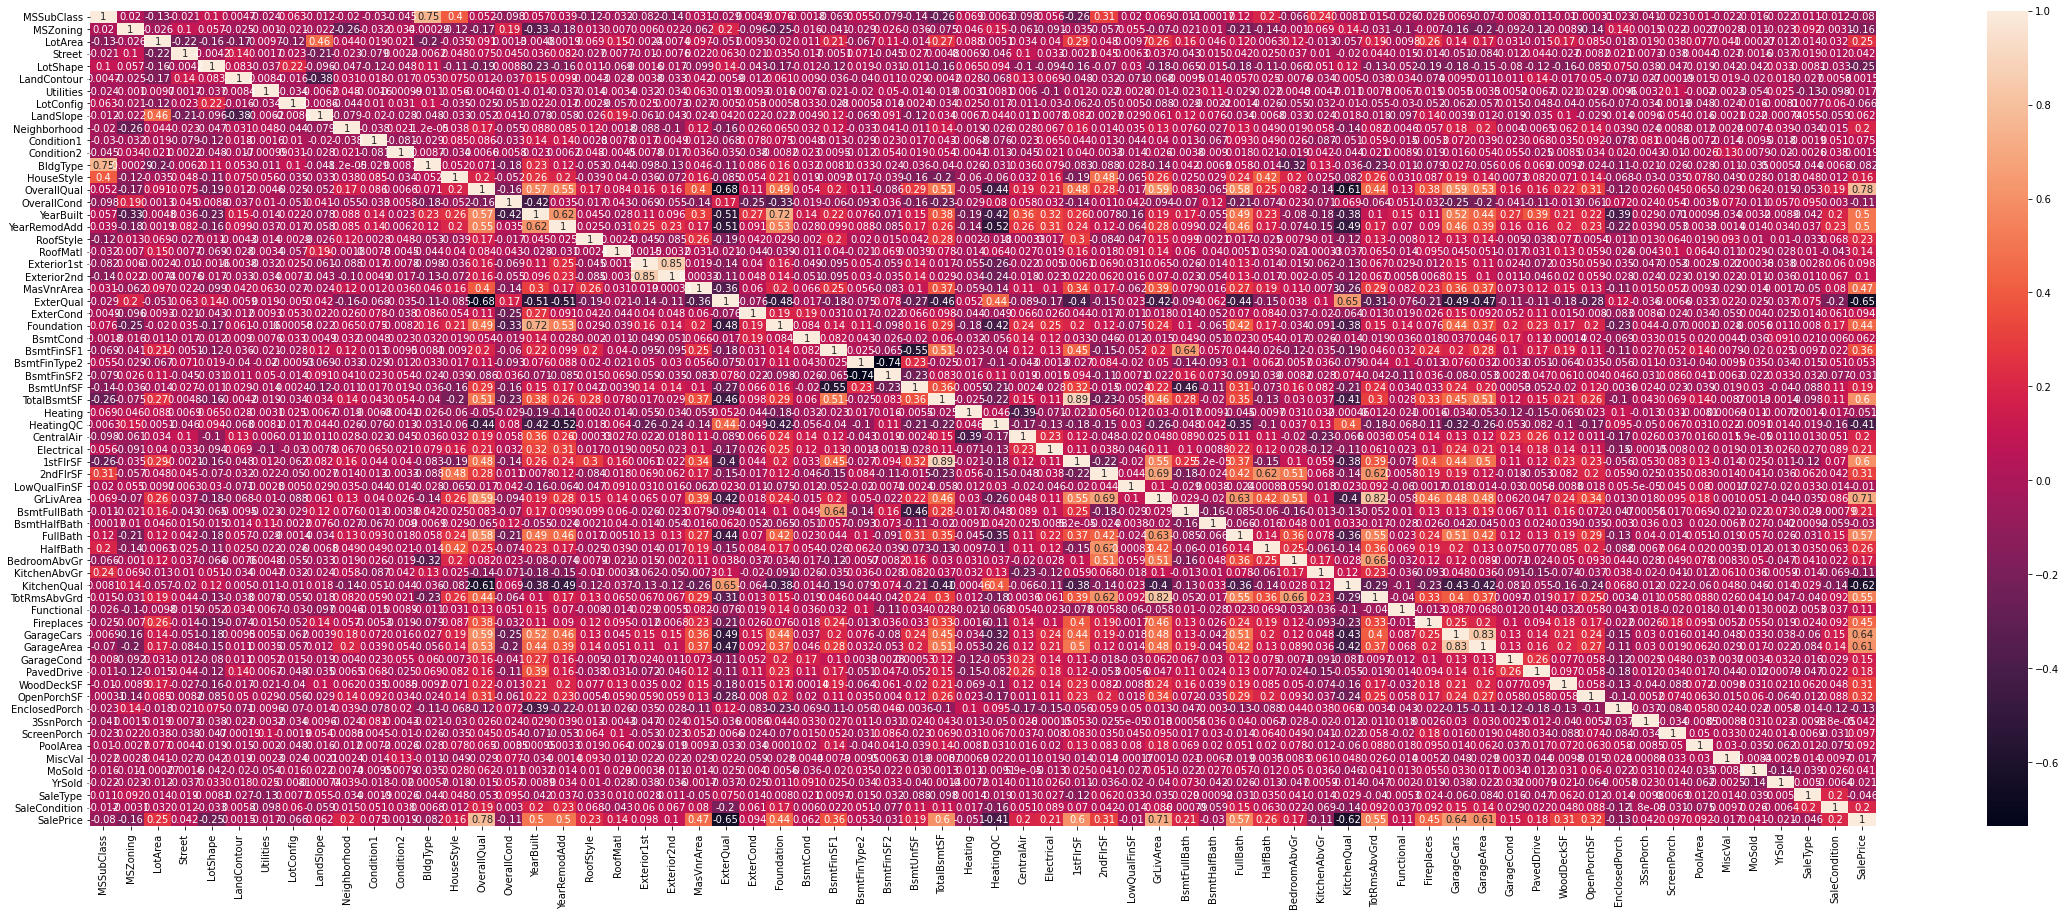

In [77]:
plt.figure(figsize=(40,15))
sns.heatmap(train.corr(), annot= True, cbar=True)

In [78]:
train = train.drop(columns = ['LotArea', 'YearBuilt', 'BsmtFinSF1', 'BsmtUnfSF', '2ndFlrSF', 'OpenPorchSF', 'WoodDeckSF', 'PoolArea', 'YrSold', 'MoSold'], axis =1)

test = test.drop(columns = ['LotArea', 'YearBuilt', 'BsmtFinSF1', 'BsmtUnfSF', '2ndFlrSF', 'OpenPorchSF', 'WoodDeckSF', 'PoolArea', 'YrSold', 'MoSold'], axis =1)

Assumption To be Followed by the model:
1. The first assumption was that
the shape of the distribution of
the continuous variables in the
multiple regression correspond to
a normal distribution.
That is, each variable’s frequency
distribution of values roughly
approximates a bell-shaped curve.

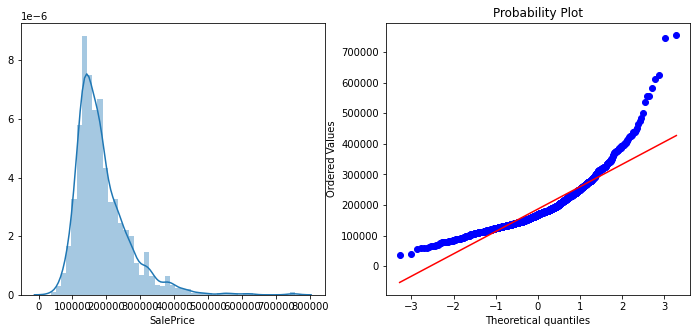

In [80]:
#normality test on target variable
plt.figure(figsize=(12,5))
import pylab
plt.subplot(1,2,1)
sns.distplot(train['SalePrice'])
plt.subplot(1,2,2)
#calculates a best-fit line for the data and plots the results using Matplotlib or a given plot function.
res = stats.probplot(train['SalePrice'], plot=plt)
pylab.show()

If the P-Value of the Shapiro Wilk Test is larger than 0.05, we assume a normal distribution
If the P-Value of the Shapiro Wilk Test is smaller than 0.05, we do not assume a normal distribution

In [81]:
# Shapiro-Wilk Test
from scipy.stats import shapiro
data = train['SalePrice']
# normality test
stat, p = shapiro(data)
print('Statistics=%.3f, p=%.3f' % (stat, p))
# interpret
alpha = 0.05
if p > alpha:
	print('Sample looks Gaussian')
else:
	print('Sample does not look Gaussian')

Statistics=0.861, p=0.000
Sample does not look Gaussian (reject H0)


The above hypothesis says that first we have to make the target sample normal using log normal

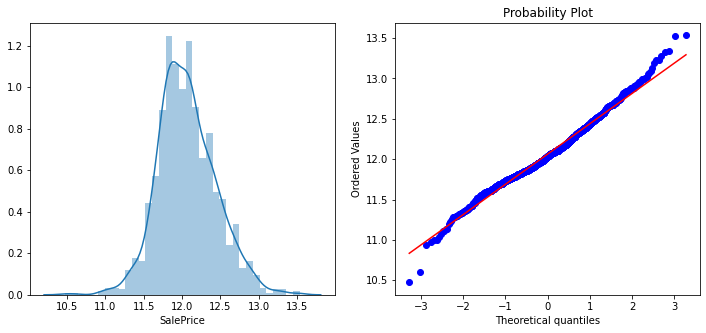

In [82]:
train['SalePrice'] = np.log(train['SalePrice'])
#normality test on target variable
plt.figure(figsize=(12,5))
import pylab
plt.subplot(1,2,1)
sns.distplot(train['SalePrice'])
plt.subplot(1,2,2)
#calculates a best-fit line for the data and plots the results using Matplotlib or a given plot function.
res = stats.probplot(train['SalePrice'], plot=plt)
pylab.show()

In [83]:
train.head()

MSSubClass  MSZoning  Street  ...  SaleType  SaleCondition  SalePrice
0          60         3       1  ...         8              4  12.247694
1          20         3       1  ...         8              4  12.109011
2          60         3       1  ...         8              4  12.317167
3          70         3       1  ...         8              0  11.849398
4          60         3       1  ...         8              4  12.429216

[5 rows x 56 columns]

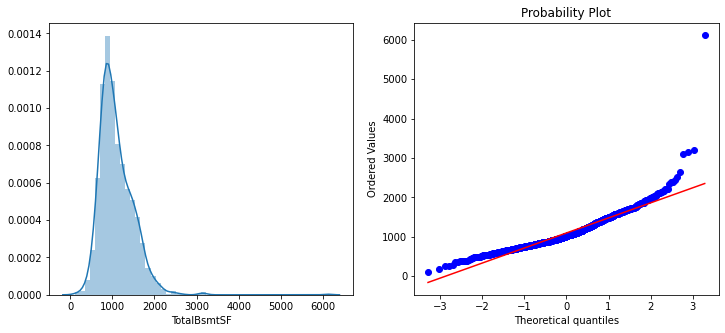

In [84]:
plt.figure(figsize=(12,5))
import pylab
plt.subplot(1,2,1)
sns.distplot(train['TotalBsmtSF'])
plt.subplot(1,2,2)
#calculates a best-fit line for the data and plots the results using Matplotlib or a given plot function.
res = stats.probplot(train['TotalBsmtSF'], plot=plt)
pylab.show()

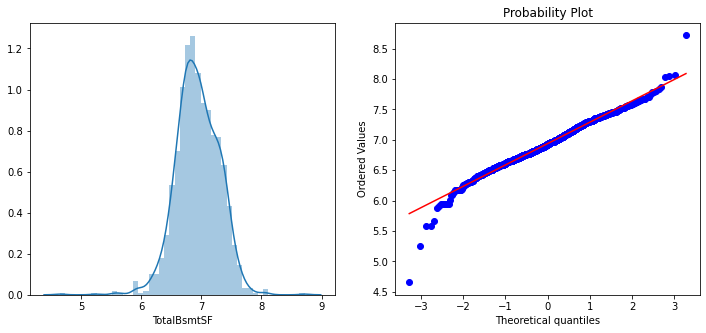

In [47]:
train['TotalBsmtSF'] = np.log(train['TotalBsmtSF'])
#normality test on target variable
plt.figure(figsize=(12,5))
import pylab
plt.subplot(1,2,1)
sns.distplot(train['TotalBsmtSF'])
plt.subplot(1,2,2)
#calculates a best-fit line for the data and plots the results using Matplotlib or a given plot function.
res = stats.probplot(train['TotalBsmtSF'], plot=plt)
pylab.show()

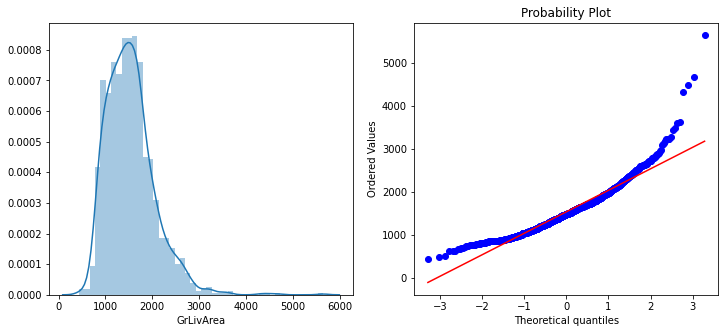

In [85]:
plt.figure(figsize=(12,5))
import pylab
plt.subplot(1,2,1)
sns.distplot(train['GrLivArea'])
plt.subplot(1,2,2)
#calculates a best-fit line for the data and plots the results using Matplotlib or a given plot function.
res = stats.probplot(train['GrLivArea'], plot=plt)
pylab.show()

In [86]:
train['GrLivArea'] = np.log(train['GrLivArea'])

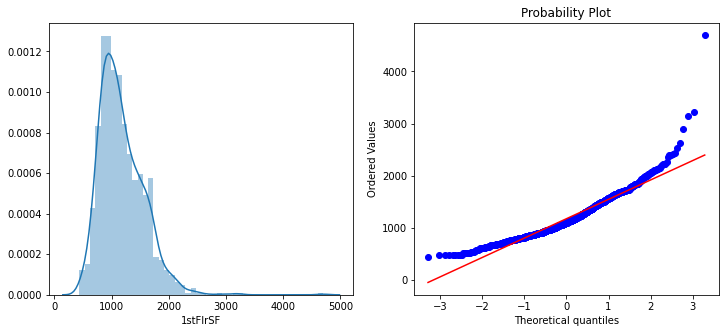

In [87]:
plt.figure(figsize=(12,5))
import pylab
plt.subplot(1,2,1)
sns.distplot(train['1stFlrSF'])
plt.subplot(1,2,2)
#calculates a best-fit line for the data and plots the results using Matplotlib or a given plot function.
res = stats.probplot(train['1stFlrSF'], plot=plt)
pylab.show()

Lets calculate the skewness of the continous features and seperate the features that are highly skewed

In [88]:
train['1stFlrSF'] = np.log(train['1stFlrSF'])

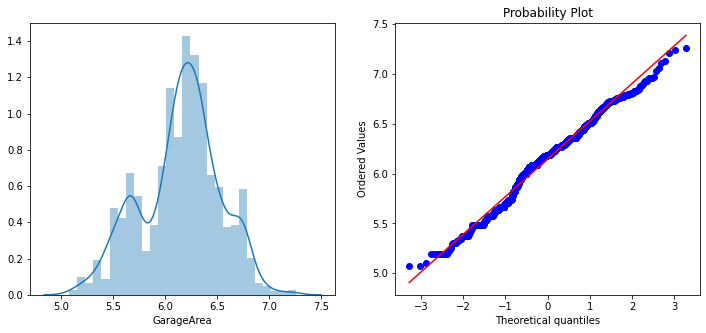

In [91]:
plt.figure(figsize=(12,5))
import pylab
plt.subplot(1,2,1)
sns.distplot(train['GarageArea'])
plt.subplot(1,2,2)
#calculates a best-fit line for the data and plots the results using Matplotlib or a given plot function.
res = stats.probplot(train['GarageArea'], plot=plt)
pylab.show()

In [90]:
train['GarageArea'] = np.log(train['GarageArea'])

In [94]:
train.shape

(1339, 56)

In [95]:
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
import xgboost as xgb
from sklearn.model_selection import KFold, cross_val_score, train_test_split
from sklearn.metrics import mean_squared_error

In [96]:
X = train.drop('SalePrice', axis =1)
y = train['SalePrice']

In [98]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state =100, test_size =0.2)

In [100]:
model_Rf = RandomForestRegressor()
model_Rf.fit(X_train, y_train)
y_pred = model_Rf.predict(X_test)

rmse_test = np.sqrt(mean_squared_error(y_test, y_pred))
SSE = np.sum((y_pred-y_test)**2)
SST = np.sum((y_test-np.mean(y_train))**2)
r2_test = 1 - SSE/SST
print("Test RMSE : ", rmse_test)
print("Test SSE : ", SSE)
print("Test SST : ", SST)
print("Test R2 : ", r2_test)

Test RMSE :  0.1483243287939651
Test SSE :  5.896028545264311
Test SST :  39.6195106799789
Test R2 :  0.8511837111546212


In [101]:
model_GB = GradientBoostingRegressor()
model_GB.fit(X_train, y_train)
y_pred = model_GB.predict(X_test)

rmse_test = np.sqrt(mean_squared_error(y_test, y_pred))
SSE = np.sum((y_pred-y_test)**2)
SST = np.sum((y_test-np.mean(y_train))**2)
r2_test = 1 - SSE/SST
print("Test RMSE : ", rmse_test)
print("Test SSE : ", SSE)
print("Test SST : ", SST)
print("Test R2 : ", r2_test)

Test RMSE :  0.13577371921436254
Test SSE :  4.940446758252549
Test SST :  39.6195106799789
Test R2 :  0.8753026810916893


We can achieve lot more by doing hyper parameter tuning and cross validation. Hope you all like a EDA and preprocessig part that i was tried. If you really like..kindly do upvote

